In [3]:
import nltk
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

In [5]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0',
            }

In [6]:
db = (('Lupe-Fiasco','drill',['The-Lions-Deen','Ghoti','Precious-Things','Kiosk','Ms-Mural','Naomi','Drill-Music-In-Zion','Seattle','On-Faux-Nem'])
         ,('J-Cole','off_season',['9-5-s-o-u-t-h','a-m-a-r-i','m-y-l-i-f-e','a-p-p-l-y-i-n-g-p-r-e-s-s-u-r-e','p-u-n-c-h-i-n-t-h-e-c-l-o-c-k','1-0-0-m-i-l','and-lil-baby-p-r-i-d-e-i-s-t-h-e-d-e-v-i-l','bas-and-6lack-l-e-t-g-o-m-y-h-a-n-d','t-h-e-c-l-i-m-b-b-a-c-k','c-l-o-s-e','and-bas-h-u-n-g-e-r-o-n-h-i-l-l-s-i-d-e'])
           ,('Lupe-Fiasco','drogas',['Drogas','Manilla','gold-vs-the-right-things-to-do','WAV-files','Down','Haile-Selassie','Alan-Forever','Stronger','Sun-God-Sam-and-The-California-Drug-Deals','XO','jonylah-forever','Kingdom','Imagine','Stack-that-cheese','Cripple','King-Nas','Quotations-from-Chairman-Fred','Happy-Timbuck2-Day','Mural-Jr'])
         )

In [7]:
x = 0
artist = db[x][0]
album = db[x][1]
tracklist = db[x][2]
data = ''

In [8]:
for track in tracklist:
    URL = f'https://genius.com/{artist}-{track}-lyrics'
    page = requests.get(URL, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    lyrics = soup.find('div', class_='Lyrics__Container-sc-1ynbvzw-6 YYrds').text
    data += lyrics
    time.sleep(30)
    print(track)

The-Lions-Deen
Ghoti
Precious-Things
Kiosk
Ms-Mural
Naomi
Drill-Music-In-Zion
Seattle
On-Faux-Nem


In [9]:
stop_words = set(stopwords.words('english'))
extra = {'’','j.','cole','&','!',',','?','\'','\'s','lupe','fiasco','m','e\'s','x','ca','\'m','\'re','j','b','[',']','n\'t','\'ll','ai','lu','na','3','\'\'','``','(',')','1','2','X',':','intro','chorus','verse'}
stop_words = stop_words.union(extra)
filtered = []

In [10]:
raw_data = word_tokenize(data)
for word in raw_data:
    if word.casefold() not in stop_words:
        filtered.append(word)

In [11]:
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered]

In [12]:
unique = set(lemmatized)
lex_div = len(unique) / len(lemmatized) * 100
print(f'Artist: {artist}')
print(f'Album: {album}')
print(f'No. of tracks: {len(db[x][2])}')
print(f'Unique words: {len(unique)}')
print(f'Lexical diversity: {round(lex_div,2)}')

Artist: Lupe-Fiasco
Album: drill
No. of tracks: 9
Unique words: 1074
Lexical diversity: 71.5


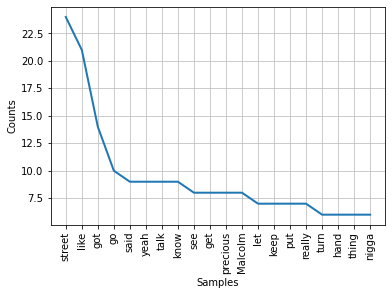

[('street', 24),
 ('like', 21),
 ('got', 14),
 ('go', 10),
 ('said', 9),
 ('yeah', 9),
 ('talk', 9),
 ('know', 9),
 ('see', 8),
 ('get', 8),
 ('precious', 8),
 ('Malcolm', 8),
 ('let', 7),
 ('keep', 7),
 ('put', 7),
 ('really', 7),
 ('turn', 6),
 ('hand', 6),
 ('thing', 6),
 ('nigga', 6)]

In [13]:
frequency = FreqDist(lemmatized)
frequency.plot(20)
frequency.most_common(20)